
**Problem Statement**

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.


**Goal**
Increase cross-traffic from Metropolis to Gotham
Increase traffic from Gotham to Metropolis

**Rubric**

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?


Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. 

Please provide details on:
- how you will implement the experiment

- what statistical test(s) you will conduct to verify the significance of the
observation

- how you would interpret the results and provide recommendations to the city
operations team along with any caveats.




**Initial premise and assumptions**
Traffic from Metropolis to Gotham might increase independently of Gotham to Metropolis.  These should be two separate data points
Drivers may increase traffic but not submit for the reimbursements. 


I think the circadian rhythms of the cities would be interesting in terms of the timing of traffic, but I would not consider it as a key metric


**Metrics**
I am assuming we can measure traffic at the toll booth.  It would be interesting but not critical to measure the direction of traffic.
If I could not measure traffic that way, then I would measure receipts for the tolls
It would be interesting to measure whether drivers were consistently applying for reimbursement, but I would use that only as a last resot.

We need a baseline.  I'll assume we already have data for the existing traffic patterns between the cities.  If not we would have to collect that.

Both sets of data should have a timestamp, but in a pinch we can bundle them by day or month - the outcome would not be as granular that way, but it should work.   I'll assume we do have a timestamp at least to the time of day .e.g. the 'hour'.


**Hypothesis**
I think it would be valid to just measure overall volume between cities, but that approach is too blunt IMO.   It would be natural for stakeholders to ask us to break it down.

To Metropolis
Null Hypothesis (H0): The reimbursement program has no effect on the volume of traffic in from Gotham to Metropolis
Alternative Hypothesis (Ha): The reimbursement program does have an effect on the volume of traffic.

To Gotham
Null Hypothesis (H0): The reimbursement program has no effect on the volume of traffic in from Metropolis to Gotham
Alternative Hypothesis (Ha): The reimbursement program does have an effect on the volume of traffic.



**Approaches**

If we were interested in assessing the relationship between the reimbursement and the traffic, we might use a chi-squared test to validate or invalidate the hypothesis, but I am not setting the hypothesis up that way.

So I think that we can use a simple t-test to validate the hypothesis.

We have to assume that traffic could increase slowly at first, so we have to let it grow before measuring for the hypothesis 


### Example
It always helps me to see some data to catch and test any nuances.
I'll cobble some traffic data that starts in February and ends in June
The reimbursement program goes into effect in April and starts out slowly, but increased with time.

I've already mentioned that I would add the direction as a variable and perform this for the two directions independently, but to keep it simple for this example I'm just going to test overall volume.

The takeaway is that we have to give the traffic enough time to have meaningful measurement.  If we take the reading to early in April we'll not get an accurate test.

### create sample data

In [30]:
import pandas as pd
from datetime import datetime
import numpy as np
from scipy import stats

traffic_df = pd.read_csv("traffic_data.csv", parse_dates=['Timestamp'])


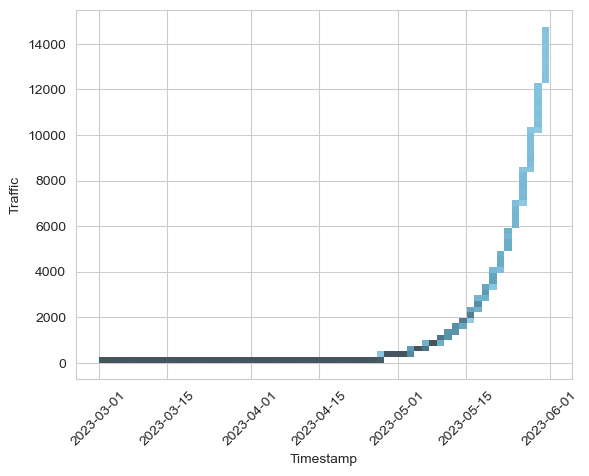

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns

bin_width = 15  # minutes per bin
sns.histplot(data=traffic_df, x='Timestamp', y='Traffic', bins=60, kde=True, color='skyblue')
plt.xticks(rotation=45)
plt.show()

### split the data into before the reimbursement and after 

In [32]:
traffic_data_before = traffic_df.loc[traffic_df['Timestamp'] <= datetime(2023, 4, 1, 0, 0, 0), 'Traffic']
traffic_data_after = traffic_df.loc[traffic_df['Timestamp'] > datetime(2023, 4, 1, 0, 0, 0), 'Traffic']

print(traffic_data_before.shape)
print(traffic_data_after.shape)

(745,)
(1463,)


### perform the t-test

In [35]:

# Perform t-test
t_stat, p_value = stats.ttest_ind(traffic_data_before, traffic_data_after)

# Output the results
print("T-statistic:", t_stat)
print("p-value:", p_value)

# Check if the p-value is less than the significance level (e.g., 0.05)
print("----------------")
if p_value < 0.05:
    print("Reject the Null hypothesis:  There is evidence to suggest that the reimbursement program had an impact on traffic.")
else:
    print("Accept the null Hypothesis:  There is no significant evidence to suggest an impact on traffic.")

T-statistic: -16.579082126468922
p-value: 2.855612534598431e-58
----------------
Reject the Null hypothesis:  There is evidence to suggest that the reimbursement program had an impact on traffic.
